Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [3]:
#loading the dataset to pandas DataFrame
gold_price = pd.read_csv('/content/gld_price_data.csv')

In [4]:
#viewing the top 5 rows
gold_price.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#the last 5 rows
gold_price.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# The number of rows and column
gold_price.shape

(2290, 6)

In [7]:
# To see the basic info of data
gold_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#for seeing the missing values
gold_price.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#viewing the stastical measure of data
gold_price.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
#Finding the Correlation 
Correlation_data = gold_price.corr()

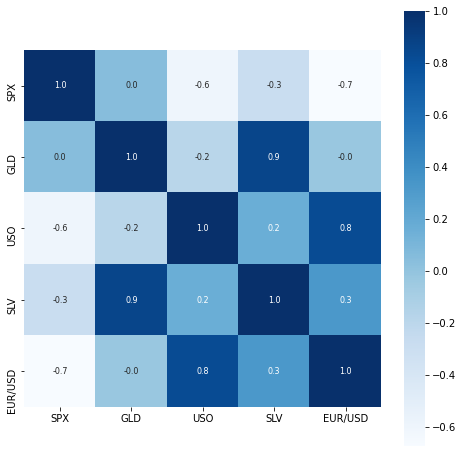

In [16]:
#ploting a heatmap 
plt.figure(figsize=(8,8))
sns.heatmap(Correlation_data,cmap='Blues',fmt='.1f',annot=True,annot_kws={'size':8},square=True,cbar=True)

In [17]:
#corellation values of GLD
print(Correlation_data['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


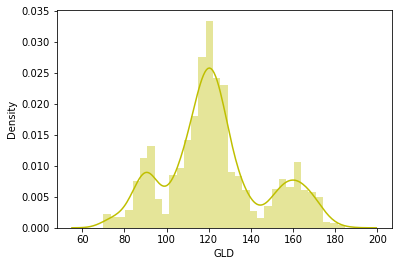

In [19]:
#checking the distribution price of GLD
sns.distplot(gold_price['GLD'],color='y')

Splitting the Feature and the Target

In [21]:
X = gold_price.drop(['Date','GLD'],axis=1)
Y = gold_price['GLD']

In [22]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [23]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splliting the Training and Test data

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training Regressor Randomforest

In [26]:
#training the model
regrossor = RandomForestRegressor(n_estimators=1000)

In [27]:
regrossor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Model Evalvation

In [28]:
test_data_predict = regrossor.predict(X_test)

In [29]:
print(test_data_predict)

[168.55963943  82.07391985 116.02184023 127.63558076 120.67823133
 154.75493741 150.2255588  126.09096042 117.44742873 125.98690074
 116.61551113 172.03570083 141.57759849 167.8539087  115.24006005
 117.59672048 138.92323338 170.21105096 159.39291286 159.21110937
 155.08886016 125.2164602  176.1981694  157.14639363 125.22119036
  93.80933974  77.4834501  120.53915006 119.1100195  167.47356977
  88.12308048 125.24762015  91.12898071 117.71909031 121.09380918
 136.23158109 115.46165124 115.23344076 147.39665963 107.20953091
 104.55164249  87.20108789 126.49344064 117.92156993 153.091599
 119.58845007 108.38379988 108.03207818  93.17241057 127.09537785
  74.96737038 113.65623916 121.2761401  111.28098903 118.90091893
 120.78580944 159.63400999 167.92376097 147.00625687  85.84281859
  94.28227035  86.83466886  90.58104006 118.96804066 126.4212105
 127.5310501  169.44968982 122.27945945 117.40439889  98.54099032
 168.27422118 142.95810855 132.05799251 121.21978218 121.2347494
 119.75350062 

comparing the real values with the predicted values

In [30]:
#R square error
error_sqr = metrics.r2_score(Y_test,test_data_predict)
print('the R square value is',error_sqr)

the R square value is 0.9896872952329744


compare the acctual values and the predicted values by plot

In [31]:
Y_test = list(Y_test)

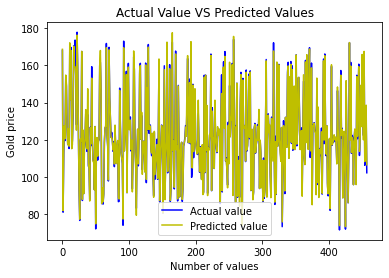

In [32]:
plt.plot(Y_test,color='b',label='Actual value')
plt.plot(test_data_predict,color='y',label='Predicted value')
plt.title('Actual Value VS Predicted Values')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()

Thank You
